This example is the right part of Fig.2 in our ATVA'16 paper titled ["*Spot 2.0 — a framework for LTL and ω-automata manipulation*"](https://www.lrde.epita.fr/~adl/dl/adl/duret.16.atva2.pdf) slightly updated to benefit from improvements in more recent versions of Spot.

In [1]:
import spot
import spot.ltsmin
spot.setup(show_default='.Ab', max_states=10)
# This extra line ensures that our test suite skips this test if divine is not installed.
spot.ltsmin.require('divine')

In [2]:
%%dve adding
int c=1, x1, x2;
process a1 {
  state Q, R, S;  init Q;
  trans Q -> R { guard c<20; effect x1 = c; },
        R -> S { effect x1 = x1 + c; },
        S -> Q { effect c = x1; };
}
process a2 {
  state Q, R, S;  init Q;
  trans Q -> R { guard c<20; effect x2 = c; },
        R -> S { effect x2 = x2 + c; },
        S -> Q { effect c = x2; };
}
system async;

In [3]:
adding

ltsmin model with the following variables:
  c: int
  x1: int
  x2: int
  a1: ['Q', 'R', 'S']
  a2: ['Q', 'R', 'S']

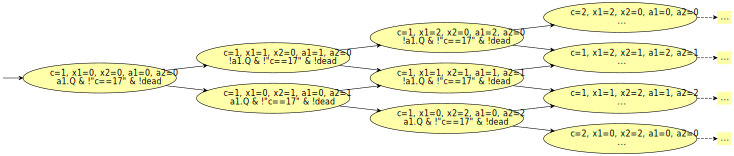

In [4]:
adding.kripke(['a1.Q', 'c==17'])

In [5]:
def model_check(model, f):
    nf = spot.formula.Not(f)
    ss = model.kripke(spot.atomic_prop_collect(nf))
    return not ss.intersects(nf.translate())

In [6]:
model_check(adding, 'F("c==2")')

True